# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_collision = pd.read_csv("./data/collisions4.csv")
df_collision.head().T

,0,1,2,3,4
police_force,metropolitan_police,metropolitan_police,metropolitan_police,metropolitan_police,metropolitan_police
number_of_vehicles,1,3,2,2,1
day_of_week,sunday,sunday,sunday,sunday,sunday
time,01:00,02:00,04:00,02:00,02:00
first_road_class,c,unclassified,a,a,a
road_type,one_way_street,single_carriageway,roundabout,single_carriageway,single_carriageway
speed_limit,20,30,30,30,30
light_conditions,darkness___lights_lit,darkness___lights_lit,darkness___lights_lit,darkness___lights_lit,darkness___lights_lit
weather_conditions,other_adverse_weather_condition,fine_no_high_winds,fine_no_high_winds,fine_no_high_winds,fine_no_high_winds
road_surface_conditions,wet_or_damp,dry,dry,dry,dry


## Visualizing distributions

### Police Force

There are 44 police forces in Great Britain, the majority of them are in England.

Below we look at the proportion of collisions in each police force (area) that were evaluated to be severe.

We can see that most police forces have far fewer severe accidents than non_severe accidents: gloucestershire is the only police_force that has a greater proportion of severe accidents.

In [138]:
severity_by_police_force = df_collision.groupby("police_force")["is_severe"].value_counts(normalize=True).to_frame().reset_index()

severity_by_police_force["severity"] = severity_by_police_force["is_severe"].apply(lambda l: "not_severe" if l == 0
                                                                                   else "severe")
severity_by_police_force.sort_values(by="proportion", ascending=False).head(10)

,police_force,is_severe,proportion,severity
64,south_wales,0,0.814318,not_severe
86,wiltshire,0,0.808081,not_severe
82,west_midlands,0,0.787724,not_severe
56,northamptonshire,0,0.772052,not_severe
48,metropolitan_police,0,0.768941,not_severe
0,avon_and_somerset,0,0.768652,not_severe
44,lincolnshire,0,0.768641,not_severe
18,dorset,0,0.767717,not_severe
6,cheshire,0,0.753819,not_severe
38,kent,0,0.749110,not_severe


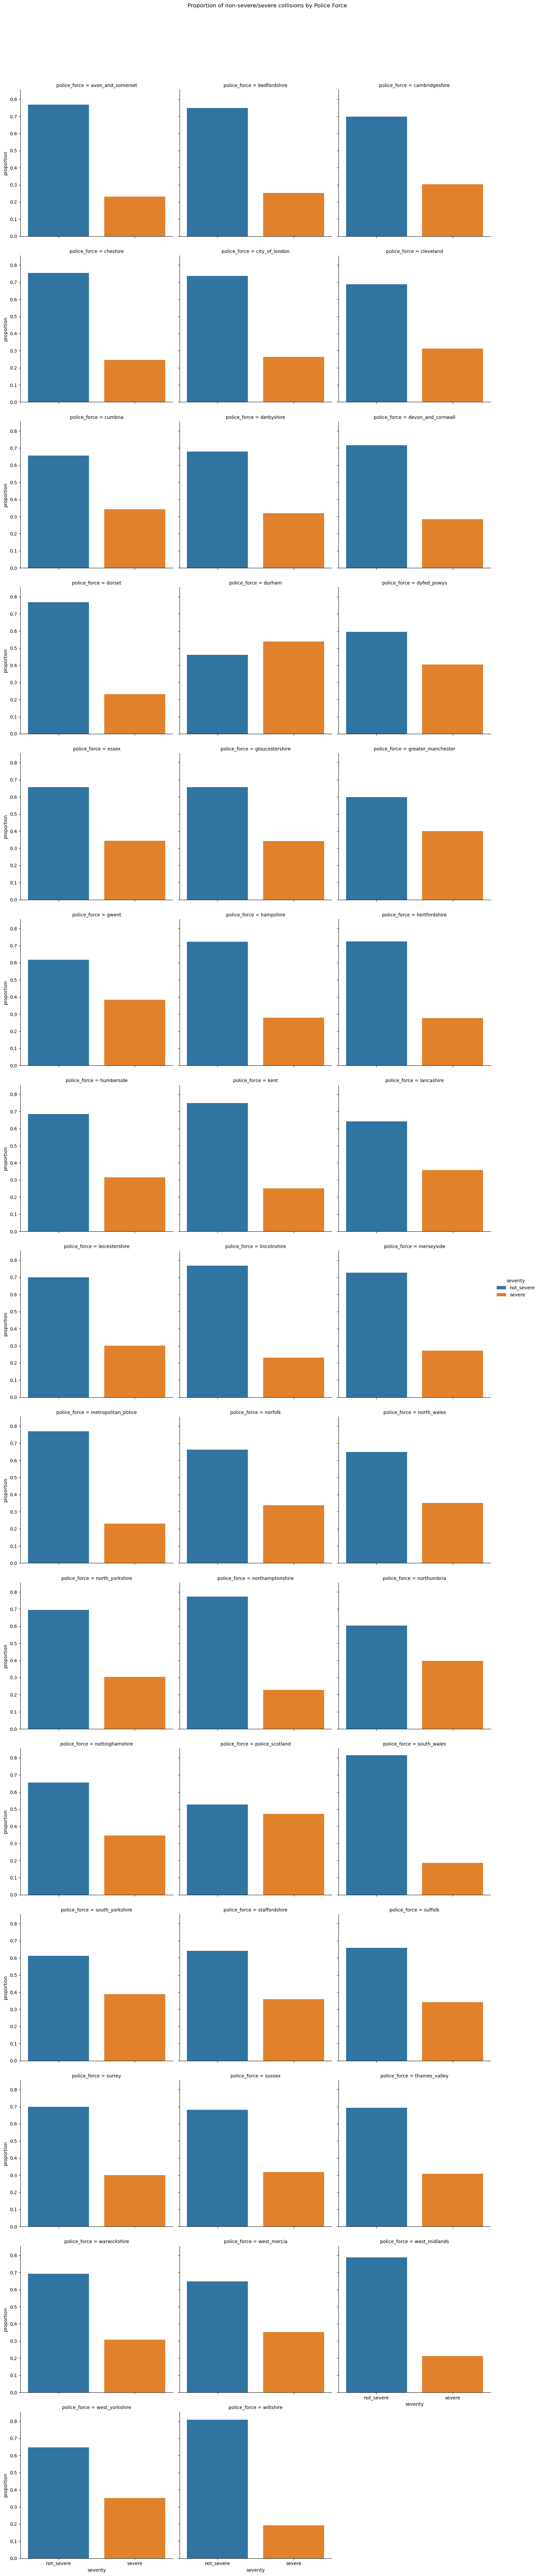

In [139]:
g = sns.catplot(data=severity_by_police_force, x="severity", y="proportion", kind="bar",hue="severity", col="police_force", col_wrap=3, legend=True)
g.fig.suptitle("Proportion of non-severe/severe collisions by Police Force", y=1.03)
plt.show()


### Number of vehicles

Most of the collisions in this dataset involved 1 or 2 vehicles. Perhaps surprisingly, when only one vehicle was involved, the likelihood that the collision would result in severe injury was higher.

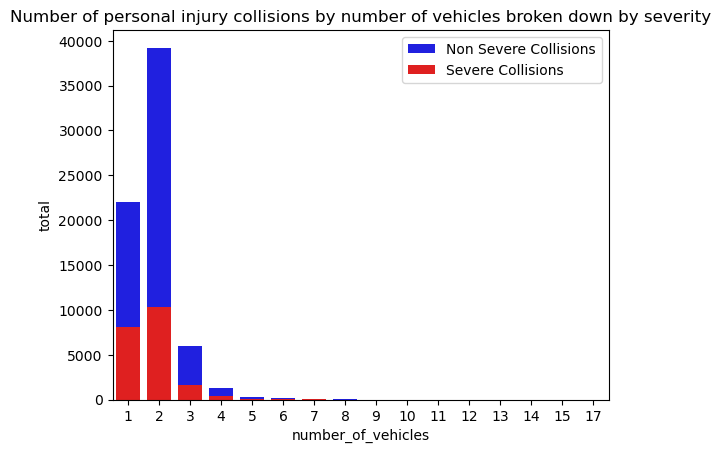

In [140]:
severity_by_number_vehicles = df_collision.groupby("number_of_vehicles")["is_severe"].value_counts().to_frame().reset_index()


totals = df_collision.groupby("number_of_vehicles")["is_severe"].count().to_dict()


severity_by_number_vehicles["total"] = severity_by_number_vehicles["number_of_vehicles"].map(totals)


sns.barplot(x="number_of_vehicles", y="total", data=severity_by_number_vehicles,
            label="Non Severe Collisions", color="b")


sns.barplot(x="number_of_vehicles", y="count", data=severity_by_number_vehicles[severity_by_number_vehicles["is_severe"] == 1],
            label="Severe Collisions", color="r")


plt.title("Number of personal injury collisions by number of vehicles broken down by severity")

plt.show()

In [150]:
df_collision.groupby("number_of_vehicles")["is_severe"].agg(["count", "mean"])

,count,mean
number_of_vehicles,,
1,22011,0.369815
2,39239,0.262723
3,5957,0.269095
4,1301,0.265181
5,327,0.348624
6,125,0.328000
7,43,0.348837
8,17,0.235294
9,8,0.750000


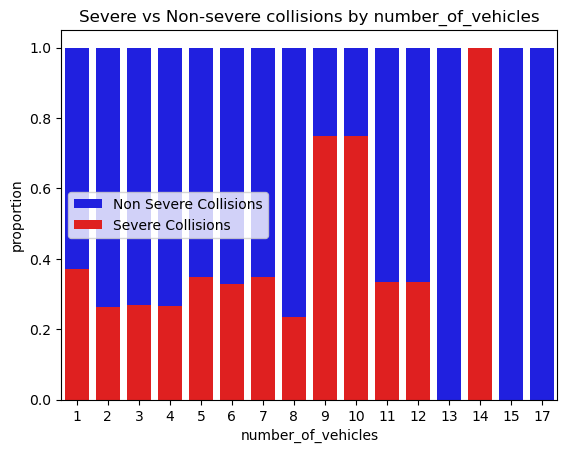

In [143]:
severity_by_number_vehicles = df_collision.groupby("number_of_vehicles")["is_severe"].value_counts(normalize=True).to_frame().reset_index()



sns.barplot(x="number_of_vehicles", y=1, data=severity_by_number_vehicles,
            label="Non Severe Collisions", color="b")


sns.barplot(x="number_of_vehicles", y="proportion", data=severity_by_number_vehicles[severity_by_number_vehicles["is_severe"] == 1],
            label="Severe Collisions", color="r")


plt.title("Severe vs Non-severe collisions by number_of_vehicles")

plt.show()

### Day of week

`day_of_week` is the day of the week that a collision occurred. This can help us understand if there are weekly patterns.

The day accidents occur is pretty evenly distributed, but there are some differences at weekends with a peak on Fridays and a dip on Sundays.

We can see that the breakup of severe/non-severe collisions is very smooth  across the days: across all days the number of accidents classified as severe was around 30%.

In [10]:
df_collision["day_of_week"] = df_collision["day_of_week"].astype("category") 
df_collision["day_of_week"] = df_collision["day_of_week"].cat.set_categories(["monday", "tuesday", "wednesday","thursday","friday","saturday","sunday"], ordered=True)

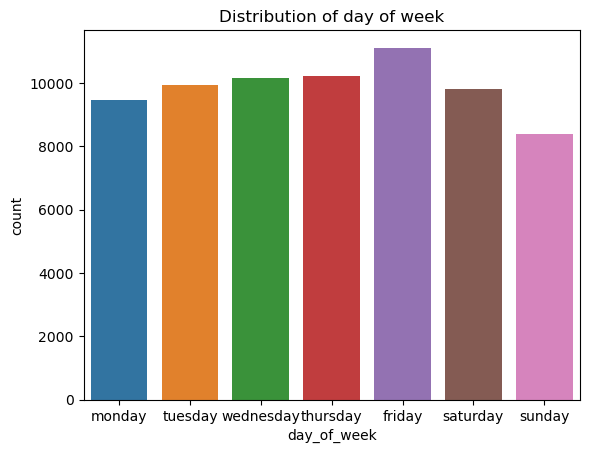

In [11]:
sns.countplot(data=df_collision, x="day_of_week", hue="day_of_week")
plt.title("Distribution of day of week")
plt.show()

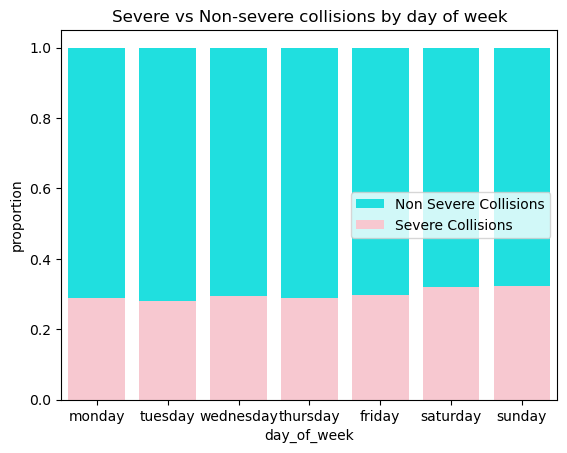

In [20]:
severity_by_day_of_week = df_collision.groupby("day_of_week", observed=True)["is_severe"].value_counts(normalize=True).to_frame().reset_index()



sns.barplot(x="day_of_week", y=1, data=severity_by_day_of_week,
            label="Non Severe Collisions", color="cyan")


sns.barplot(x="day_of_week", y="proportion", data=severity_by_day_of_week[severity_by_day_of_week["is_severe"] == 1],
           label="Severe Collisions", color="pink")


plt.title("Severe vs Non-severe collisions by day of week")

plt.show()

### Time

In the time data, we can observe that there are a couple of peaks at 08:00 and at 16:00 i.e. rush hour. 

The distribution of the proportion of accidents classified as severe is not as uniform as day of the week and it looks like more accidents were classified as severe in the early morning.

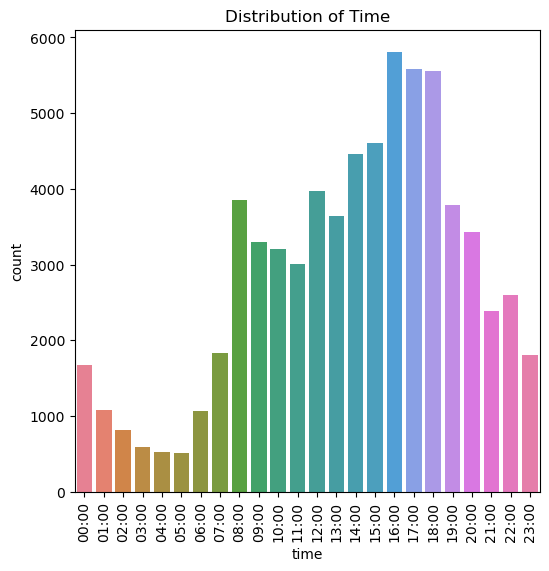

In [146]:
df_collision["time"] = df_collision["time"].astype("category") 
df_collision["time"] = df_collision["time"].cat.as_ordered()

fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(data=df_collision, x="time",hue="time",ax=ax)
plt.xticks(rotation=90)
plt.title("Distribution of Time")
plt.show()

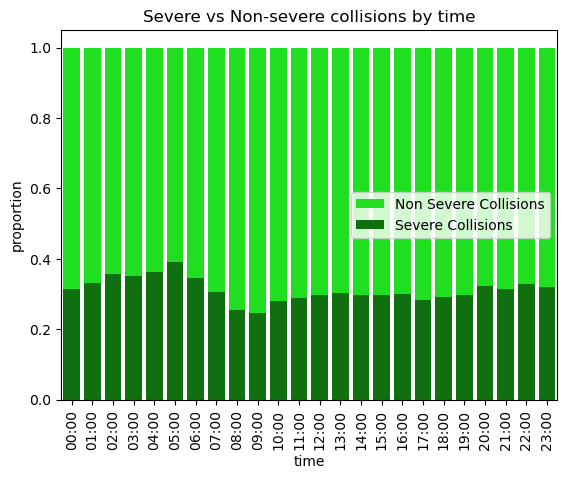

In [24]:
severity_by_time = df_collision.groupby("time", observed=True)["is_severe"].value_counts(normalize=True).to_frame().reset_index()



sns.barplot(x="time", y=1, data=severity_by_time,
            label="Non Severe Collisions", color="lime")


sns.barplot(x="time", y="proportion", data=severity_by_time[severity_by_time["is_severe"] == 1],
           label="Severe Collisions", color="green")


plt.title("Severe vs Non-severe collisions by time")
plt.xticks(rotation=90)
plt.show()

### Month

We do some seasonality differences: there tend to be more accidents in the early summer months and less in the winter months (although January does not follow this pattern).

The breakup of severe/non-severe collisions is very smooth  across the months: across all days the number of accidents classified as severe was around 30%.

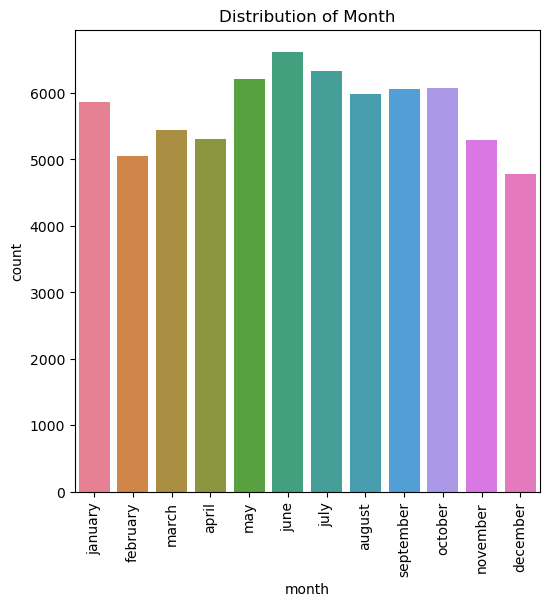

In [147]:
df_collision["month"] = df_collision["month"].astype("category") 
df_collision["month"] = df_collision["month"].cat.set_categories(["january", "february", "march","april","may","june","july","august","september","october","november","december"], ordered=True)


fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(data=df_collision, x="month",hue="month",ax=ax)
plt.xticks(rotation=90)
plt.title("Distribution of Month")
plt.show()

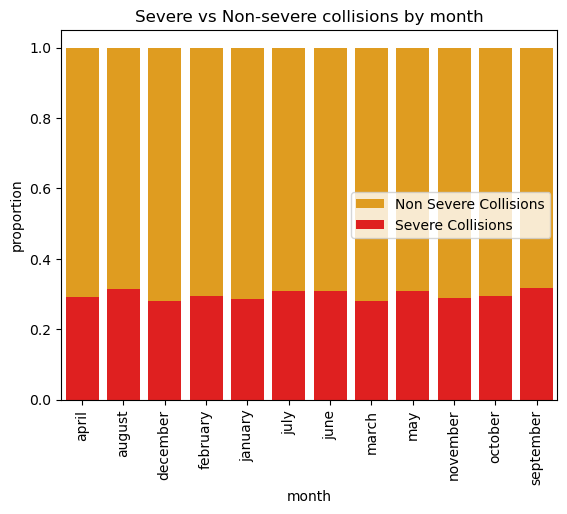

In [25]:
severity_by_month = df_collision.groupby("month", observed=True)["is_severe"].value_counts(normalize=True).to_frame().reset_index()



sns.barplot(x="month", y=1, data=severity_by_month,
            label="Non Severe Collisions", color="orange")


sns.barplot(x="month", y="proportion", data=severity_by_month[severity_by_month["is_severe"] == 1],
           label="Severe Collisions", color="red")


plt.title("Severe vs Non-severe collisions by month")
plt.xticks(rotation=90)
plt.show()

### Day of Year

This follows a similar pattern to month but provides more granularity - we can see that there is a stark drop in collisions around Christmas and New Year (last two weeks and first week).

The skew is close to zero, so this distribution is fairly symmetric. 

In [5]:
df_collision["day_of_year"].skew()

np.float64(-0.022157954547173467)

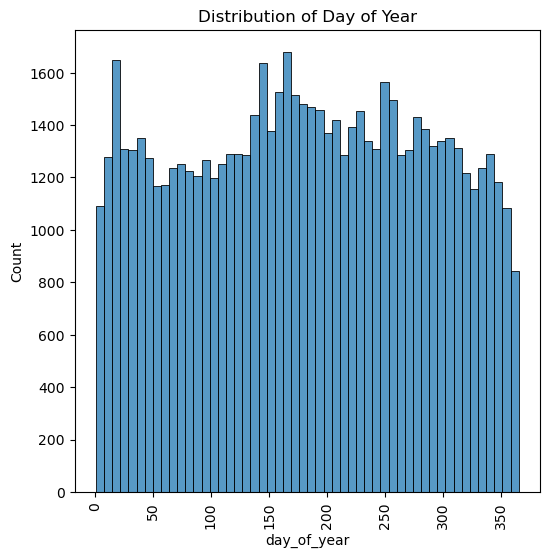

In [148]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(data=df_collision, x="day_of_year",ax=ax, bins=52)
plt.xticks(rotation=90)
plt.title("Distribution of Day of Year")
plt.show()